#To DO
Train Autoencoder G2, G3, model1, model 3
Make final autoencoder

Gan 
train discrimintor separatly 
Conditional train discriminator

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Imports

In [0]:
import csv
import numpy as np
import random
import torch
import torch.utils.data
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
import math

#Helper Functions

##Loader Function

In [0]:
def loader_function(dataset, batchsize=1, shuffle=False):
  
  """
  Creates a loader of batch size = batchsize from the dataset. Used for iteration
  """

  load = torch.utils.data.DataLoader(dataset, batch_size=batchsize, shuffle = shuffle, num_workers=0)
  return load

##Visualization Function

In [0]:
def Visualize(model, feedset, originalset, num_of_img=1, loaded = False, start=0):
  #not randomized

  if num_of_img > len(feedset):
    return print("Not enough imgs in dataset\nDataset has {}".format(len(feedset)))
     
  if len(feedset) != len(originalset):
    return print("Two datasets have different number of data")
    
  

  load = torch.utils.data.DataLoader(feedset, batch_size=1, num_workers=0)
  c_load = torch.utils.data.DataLoader(originalset, batch_size=1, num_workers=0)

  k=0
  j=0
  for data1, data2 in zip(load, c_load):
    if j<start:
      j+=1
    else:
      img_f, label_f = data1
      img_c, label_c = data2

      if loaded:
        output = model(img_f)
      else:
        img_f = img_f.cuda() 
        output = model(img_f)
        output=output.cpu()

      output = output.detach().numpy()
      output = np.transpose(output[0], [1,2,0])
      img_c = np.transpose(img_c[0], [1,2,0])

      plt.subplot(num_of_img, 2, 2*k+1)
      plt.axis('off')
      plt.imshow(output)

      plt.subplot(num_of_img, 2, 2*k+2)
      plt.axis('off')
      plt.imshow(img_c)

      k+=1
      if k == num_of_img:
        break 

In [0]:
def Visualize2(model, feedset, originalset, num_of_img=1, loaded = False, start=0):
  #not randomized

  if num_of_img > len(feedset):
    return print("Not enough imgs in dataset\nDataset has {}".format(len(feedset)))
    
  if len(feedset) != len(originalset):
    return print("Two datasets have different number of data")
    
  

  load = torch.utils.data.DataLoader(feedset, batch_size=1, num_workers=0)
  c_load = torch.utils.data.DataLoader(originalset, batch_size=1, num_workers=0)

  k=0
  j=0
  for data1, data2 in zip(load, c_load):
    if j<start:
      j+=1
    else:
      img_f, label_f = data1
      img_c, label_c = data2

      if loaded:
        output = model(img_f)
      else:
        img_f = img_f.cuda() 
        output = model(img_f)
        output=output.cpu()

      output = output.detach().numpy()
      output = np.transpose(output[0], [1,2,0])
      img_c = np.transpose(img_c[0], [1,2,0])
      img_f = np.transpose(img_f[0], [1,2,0])


 
 
      plt.subplot(num_of_img, 3, 3*k+1)
      plt.axis('off')
      img_f2 = img_f.detach().numpy()
      plt.imshow(img_f2)

      plt.subplot(num_of_img, 3, 3*k+2)
      plt.axis('off')
      plt.imshow(output)

      plt.subplot(num_of_img, 3, 3*k+3)
      plt.axis('off')      
      plt.imshow(img_c)



      k+=1
      if k == num_of_img:
        break 

##Single picture display

In [0]:
def display(T):
  #plot a tensor [3,128,128] input
  T = T.detach().numpy()
  out = np.transpose(T, [1,2,0])
  plt.imshow(out)


##Demonstrate functions

In [0]:
def testshow(model, iml, train = False):
  """
  input url string
  """
  
  path ='drive/My Drive/APS360H1 Project/test/'

  #Creating Dataset
  transform = transforms.Compose(
        [transforms.ToTensor()])
  ottoset = torchvision.datasets.ImageFolder(root = path, transform=transform)

  img_o = ottoset[0][0]
  img_g = img_o.unsqueeze(0)

  if train:
    img_g=img_g.cuda()
    model.cuda()
  else:
    pass
  
  output = model(img_g)
  output=output.cpu()
  output = output.squeeze()
  output = output.detach().numpy()
  #output = output.unsqueeze()

  output = np.transpose(output, [1,2,0])
  img_o = np.transpose(img_o, [1,2,0])
  #iml = np.transpose(iml,[1,2,0])

  plt.subplot(1, 3, 2)
  plt.axis('off')
  plt.imshow(output)

  plt.subplot(1, 3, 1)
  plt.axis('off')
  plt.imshow(img_o)

  plt.subplot(1, 3, 3)
  plt.axis('off')
  plt.imshow(iml)

In [0]:
def demonstrate(url,model,train=False):

  from PIL import Image
  import requests
  from io import BytesIO
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  newsize = (128, 128) 
  im1 = img.resize(newsize) 
  
  img2 = im1.convert('LA')
  #img2.show
  #isplay(img2)
  #print(type(img2))
  #cv2.imwrite('C:/Users/N/Desktop/Test_gray.jpg', image_gray) 
 
  img2.save("drive/My Drive/APS360H1 Project/test/test/greyscale.png")
  #cv2.imwrite('drive/My Drive/APS360H1 Project/test/test/greyscale.jpg', img2)

  testshow(model,im1,train)

In [0]:
#path = 'https://www.thompson-morgan.com/product_images/100/zoom/z-HEL6947-A_h.jpg'

#demonstrate(path)

# Creating Dataset

In [0]:
#Google drive load
#refer to parent folder of the .../name/name/
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

c_path = 'drive/My Drive/APS360H1 Project/Dataset/color'
#c_path = 'drive/My Drive/APS360H1 Project/rand_dataset/color'
#c_path = 'drive/My Drive/APS360H1 Project/flower images/color'


g_path =  'drive/My Drive/APS360H1 Project/Dataset/gray'
#g_path =  'drive/My Drive/APS360H1 Project/rand_dataset/gray'
#g_path =  'drive/My Drive/APS360H1 Project/flower images/gray'



#t_path = 'drive/My Drive/APS360H1 Project/Dataset/test'
#tc_path='drive/My Drive/APS360H1 Project/Dataset/test_targets'
tg_path = 'drive/My Drive/APS360H1 Project/Dataset/gray'
tc_path = 'drive/My Drive/APS360H1 Project/Dataset/color'


#op_path='drive/My Drive/APS360H1 Project/Dataset/OpenImage'





Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


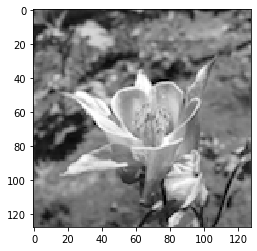

(128, 128)


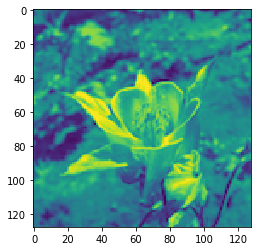

In [0]:
#Checking if path is correct 
image_path= 'drive/My Drive/APS360H1 Project/Dataset/gray/gray_flower_images/0054_grey.png'
image_path2= 'drive/My Drive/APS360H1 Project/Dataset/color/flower_images/0054.png'
from PIL import Image

fname = 'image.png'
image = Image.open(image_path).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

img = plt.imread(image_path)
plt.imshow(img)
print(img.shape)

In [0]:
#Creating Dataset
transform1 = transforms.Compose(
        [
         #transforms.CenterCrop(128),
            transforms.ToTensor()
         ])

colorset = torchvision.datasets.ImageFolder(root = c_path, transform=transform1, target_transform=None, is_valid_file=None)

In [0]:
transform2 = transforms.Compose(
        [
         #transforms.CenterCrop(128),
            transforms.ToTensor()
         ])

greyset = torchvision.datasets.ImageFolder(root=g_path, transform=transform2)

In [0]:
#Creating test set
transform3 = transforms.Compose(
        [transforms.CenterCrop(128),      
            transforms.ToTensor(),
               ])
test_set = torchvision.datasets.ImageFolder(root=t_path, transform=transform3)
test_c_set = torchvision.datasets.ImageFolder(root=tc_path, transform=transform3)
test_g_set = torchvision.datasets.ImageFolder(root=tg_path, transform=transform3)


In [0]:
#transform4 = transforms.Compose(
#        [transforms.Resize(256,256),      
#            transforms.ToTensor(),
#               ])
#op_set = torchvision.datasets.ImageFolder(root=op_path, transform=transform4)

In [0]:
print(len(greyset))
print(len(colorset))
print(len(test_g_set))
print(len(test_c_set))
#print(len(op_path))

##Concate Dataset

In [0]:
import time
start_time = time.time()
tensor_x = torch.stack([i[0] for i in greyset])
tensor_y = torch.stack([i[0] for i in colorset])
concatset = torch.utils.data.TensorDataset(tensor_x,tensor_y)
end_time = time.time()
end_time-start_time

47.855534076690674

In [0]:
concatset = data

#Model

##2 Layer Autoencoder

Basic conv Autoencoder architecture

In [0]:
class CNNAutoEncoder(nn.Module):
    def __init__(self):
        super(CNNAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
            
            
        )
        self.decoder = nn.Sequential(
            
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),

            nn.Sigmoid() # get to the range (0, 1)
        )

    def forward(self, x):
        #print("starting encoder")
      
        x = self.encoder(x)
        #print("encodes properly")
        x = self.decoder(x)
        return x

##3 Layer Autoencoder

In [0]:
class CNNAutoEncoderv2(nn.Module):
    def __init__(self):
        super(CNNAutoEncoderv2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),
            
            nn.ReLU(),
            nn.Conv2d(64,128, 3)
            
            
        )
        self.decoder = nn.Sequential(
            
            nn.ConvTranspose2d(128,64,3),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),

            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=2, output_padding=0),
            nn.ReLU(),

            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=2, output_padding=1),
            nn.Sigmoid() # get to the range (0, 1)
        )

    def forward(self, x):
        #print("starting encoder")
      
        x = self.encoder(x)
        #print("encodes properly")
        x = self.decoder(x)
        return x

##3 Layer with Leaky ReLU

In [0]:
class CNNAutoEncoderv3(nn.Module):
    def __init__(self):
        super(CNNAutoEncoderv3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=2),
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=2),
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, 7),
            nn.LeakyReLU(),
            nn.Conv2d(64,128, 3)
            
            
        )
        self.decoder = nn.Sequential(
            
            nn.ConvTranspose2d(128,64,3),
            nn.LeakyReLU(),

            nn.ConvTranspose2d(64, 32, 7),
            nn.LeakyReLU(),

            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=2, output_padding=0),
            nn.LeakyReLU(),

            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=2, output_padding=1),
            nn.Sigmoid()
            #nn.Tanh() # get to the range (0, 1)
        )

    def forward(self, x):
        #print("starting encoder")
        x = self.encoder(x)
        #print("encodes properly")
        x = self.decoder(x)
        return x

##Final Autoencoder

In [0]:
# conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
# conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
# conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
# conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
# conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
# pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
# conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
# conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
# pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
# conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
# conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

In [0]:
class Autoencoder_f(nn.Module):
    def __init__(self):
        super(Autoencoder_f, self).__init__()
        self.l1 = nn.Conv2d(3, 64, 3, stride = 2, padding= 1)
        self.b1 = nn.BatchNorm2d(64)

        self.l2 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.b2 = nn.BatchNorm2d(128)

        self.l3 = nn.Conv2d(128, 128, 3,stride = 2, padding= 1)
        self.b3 = nn.BatchNorm2d(128)

        self.l4 = nn.Conv2d(128, 256, 3,stride = 1, padding= 1)
        self.b4 = nn.BatchNorm2d(256)

        self.l5 = nn.Conv2d(256,512,3, stride=2, padding=1)
        self.b5 = nn.BatchNorm2d(512)
        
        self.t1 = nn.ConvTranspose2d(512, 256, 3,stride = 2,padding = 1,output_padding=1)
        self.tb1 = nn.BatchNorm2d(256)

        self.t2 = nn.Conv2d(512, 256, 3,stride=1,padding=1)
        self.tb2 = nn.BatchNorm2d(256)

        self.t3 = nn.ConvTranspose2d(256, 128, 3,stride = 2,padding = 1,output_padding=1)
        self.tb3 = nn.BatchNorm2d(128)

        self.t4 = nn.Conv2d(256, 128, 3,stride=1,padding=1)
        self.tb4 = nn.BatchNorm2d(128)

        self.t5 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.tb5 = nn.BatchNorm2d(64)

        self.t6 = nn.Conv2d(64, 3, 3,stride=1,padding=1)
        #self.act = torch.tanh()
        self.act = nn.Sigmoid()
        
        self.relu = nn.ReLU()

    def forward(self, x):
        #128,128,3

        conv1 = self.l1(x) 
        conv1 = self.b1(conv1)
        conv1 = self.relu(conv1)
        #64,64, 64

        conv2 = self.l2(conv1)
        conv2 = self.b2(conv2)
        conv2 = self.relu(conv2)
        #64,64, 128

        conv3 = self.l3(conv2)
        conv3 = self.b3(conv3)
        conv3 = self.relu(conv3)
        #32,32, 128

        conv4 = self.l4(conv3)
        conv4 = self.b4(conv4)
        conv4 = self.relu(conv4)
        #32,32, 256

        conv5 = self.l5(conv4)
        conv5 = self.b5(conv5)
        conv5 = self.relu(conv5)
        #16,16, 512

        #downsample done
        #Embedding
        #upsampling

        conv6 = self.t1(conv5)
        conv6 = self.tb1(conv6)
        conv6 = self.relu(conv6)
        #32,32, 256
        conv6 = torch.cat((conv6, conv4),1)
        #32,32, 512

        conv7 = self.t2(conv6)
        conv7 = self.tb2(conv7)
        conv7 = self.relu(conv7)
        #32,32, 256

        conv8 = self.t3(conv7)
        conv8 = self.tb3(conv8)
        conv8 = self.relu(conv8)
        #64,64, 128
        conv8 = torch.cat((conv8,conv2),1)
        #64,64, 256

        conv9 = self.t4(conv8)
        conv9 = self.tb4(conv9)
        conv9 = self.relu(conv9)
        #64,64, 128

        conv10 = self.t5(conv9)
        conv10 = self.tb5(conv10)
        conv10 = self.relu(conv10)
        #128,128, 64

        conv11 = self.t6(conv10)
        conv11 = self.act(conv11)
        #128,128,3

        return conv11

##GAN

In [0]:
#test with 128*128*3

#Gen
#Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2
#Skip connection by concatenating 

#Dis
#Conv, same as G

class Discriminator1(nn.Module):
    def __init__(self):
        super(Discriminator1, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
     
        self.fc1 = nn.Linear(8*8*128, 64)
        self.fc2 = nn.Linear(64, 1)
        self.act = nn.Sigmoid()
       
    def forward(self, x):
        x = self.l1(x) #128 3-16
        x = self.pool(F.leaky_relu(x)) 
        x = self.l2(x) #64 16-32
        x = self.pool(F.leaky_relu(x))
        x = self.l3(x) #32 32- 64
        x = self.pool(F.leaky_relu(x))
        x = self.l4(x) #16 64-128
        x = self.pool(F.leaky_relu(x)) #8
                      

        LN = x.view(-1, 128*8*8) #flatten input to vector 
        LN = F.leaky_relu(self.fc1(LN))
        LN = self.fc2(LN)
        LN = self.act(LN)
        LN = LN.squeeze(1) #flatten batch size greater than 1
        return LN
        

class Generator1(nn.Module):
    def __init__(self):
        super(Generator1, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.t1 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.t2 = nn.ConvTranspose2d(64, 32, 3,stride = 2,padding = 1,output_padding=1)
        self.t3 = nn.ConvTranspose2d(32, 16, 3,stride = 2,padding = 1,output_padding=1)
        self.t4 = nn.ConvTranspose2d(16, 3, 3,stride = 2,padding = 1,output_padding=1)

        self.act = nn.Sigmoid()

    def forward(self, x):
        #128,128,3
        l1 = self.l1(x) 
        #128,128 16
        l1p = F.leaky_relu(self.pool(l1))
        #64,64, 16
        l2 = self.l2(l1p) 
        #64,64 32
        l2p = F.leaky_relu(self.pool(l2)) 
        #32,32,32
        l3 = self.l3(l2p) 
        #32,32, 64
        l3p = F.leaky_relu(self.pool(l3)) 
        #16,16, 64
        l4 = self.l4(l3p) 
        #16,16, 128
        l4p = F.leaky_relu(self.pool(l4)) 
        #8,8,128
        
        t1 = self.t1(l4p)
        #16,16, 64
        #t1p = torch.cat((t1,l3p),1) 
        #16,16, 64+64=128
        t2 = self.t2(t1)
        #32,32, 32
        #t2p = torch.cat((t2,l2p),1)
        #32,32, 32+32 =64
        t3 = self.t3(t2)
        #64,64, 16
        #t3p = torch.cat((t3, l1p),1)
        #64,64 16+16=32
        t4 = self.t4(t3)
        #128,128, 3
        out = self.act(t4)

        return out


##GAN2

In [0]:
#test with 128*128*3

#Gen
#Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2
#Skip connection by concatenating 

#Dis
#Conv, same as G

class Discriminator2(nn.Module):
    def __init__(self):
        super(Discriminator2, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
     
        self.fc1 = nn.Linear(8*8*128, 64)
        self.fc2 = nn.Linear(64, 1)
        self.act = nn.Sigmoid()
       
    def forward(self, x):
        x = self.l1(x) #128 3-16
        x = self.pool(F.leaky_relu(x)) 
        x = self.l2(x) #64 16-32
        x = self.pool(F.leaky_relu(x))
        x = self.l3(x) #32 32- 64
        x = self.pool(F.leaky_relu(x))
        x = self.l4(x) #16 64-128
        x = self.pool(F.leaky_relu(x)) #8
                      

        LN = x.view(-1, 128*8*8) #flatten input to vector 
        LN = F.leaky_relu(self.fc1(LN))
        LN = self.fc2(LN)
        LN = self.act(LN)
        LN = LN.squeeze(1) #flatten batch size greater than 1
        return LN
        

class Generator2(nn.Module):
    def __init__(self):
        super(Generator2, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.t1 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.t2 = nn.ConvTranspose2d(128, 32, 3,stride = 2,padding = 1,output_padding=1)
        self.t3 = nn.ConvTranspose2d(64, 16, 3,stride = 2,padding = 1,output_padding=1)
        self.t4 = nn.ConvTranspose2d(32, 3, 3,stride = 2,padding = 1,output_padding=1)

        self.act = nn.Sigmoid()

    def forward(self, x):
        #128,128,3
        l1 = self.l1(x) 
        #128,128 16
        l1p = F.leaky_relu(self.pool(l1),0.2)
        #64,64, 16
        l2 = self.l2(l1p) 
        #64,64 32
        l2p = F.leaky_relu(self.pool(l2),0.2) 
        #32,32,32
        l3 = self.l3(l2p) 
        #32,32, 64
        l3p = F.leaky_relu(self.pool(l3),0.2) 
        #16,16, 64
        l4 = self.l4(l3p) 
        #16,16, 128
        l4p = F.leaky_relu(self.pool(l4),0.2) 
        #8,8,128
        
        t1 = self.t1(l4p)
        #16,16, 64
        t1p = torch.cat((t1,l3p),1) 
        #16,16, 64+64=128
        t2 = self.t2(t1p)
        #32,32, 32
        t2p = torch.cat((t2,l2p),1)
        #32,32, 32+32 =64
        t3 = self.t3(t2p)
        #64,64, 16
        t3p = torch.cat((t3, l1p),1)
        #64,64 16+16=32
        t4 = self.t4(t3p)
        #128,128, 3
        out = self.act(t4)

        return out


##GAN3

In [0]:
#test with 128*128*3

#Gen
#Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2
#Skip connection by plus 

#Dis
#Conv, same as G

class Discriminator3(nn.Module):
    def __init__(self):
        super(Discriminator3, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
     
        self.fc1 = nn.Linear(8*8*128, 64)
        self.fc2 = nn.Linear(64, 1)
        self.act = nn.Sigmoid()
       
    def forward(self, x):
        x = self.l1(x) #128 3-16
        x = self.pool(F.leaky_relu(x),0.2)
        x = self.l2(x) #64 16-32
        x = self.pool(F.leaky_relu(x),0.2)
        x = self.l3(x) #32 32- 64
        x = self.pool(F.leaky_relu(x))
        x = self.l4(x) #16 64-128
        x = self.pool(F.leaky_relu(x)) #8
                      

        LN = x.view(-1, 128*8*8) #flatten input to vector 
        LN = F.leaky_relu(self.fc1(LN))
        LN = self.fc2(LN)
        LN = self.act(LN)
        LN = LN.squeeze(1) #flatten batch size greater than 1
        return LN
        

class Generator3(nn.Module):
    def __init__(self):
        super(Generator3, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.t1 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.t2 = nn.ConvTranspose2d(64, 32, 3,stride = 2,padding = 1,output_padding=1)
        self.t3 = nn.ConvTranspose2d(32, 16, 3,stride = 2,padding = 1,output_padding=1)
        self.t4 = nn.ConvTranspose2d(16, 3, 3,stride = 2,padding = 1,output_padding=1)

        self.act = nn.Sigmoid()

    def forward(self, x):
        #128,128,3
        l1 = self.l1(x) 
        #128,128 16
        l1p = F.leaky_relu(self.pool(l1),0.2)
        #64,64, 16
        l2 = self.l2(l1p) 
        #64,64 32
        l2p = F.leaky_relu(self.pool(l2),0.2) 
        #32,32,32
        l3 = self.l3(l2p) 
        #32,32, 64
        l3p = F.leaky_relu(self.pool(l3),0.2) 
        #16,16, 64
        l4 = self.l4(l3p) 
        #16,16, 128
        l4p = F.leaky_relu(self.pool(l4),0.2) 
        #8,8,128
        
        t1 = self.t1(l4p)
        #16,16, 64
        t1p = t1+l3p 
        #16,16, 64+64=128
        t2 = self.t2(t1p)
        #32,32, 32
        t2p = t2+l2p
        #32,32, 32+32 =64
        t3 = self.t3(t2p)
        #64,64, 16
        t3p = t3+l1p
        #64,64 16+16=32
        t4 = self.t4(t3p)
        #128,128, 3
        out = self.act(t4)

        return out

##test Gan

In [0]:
#Based on Gan3
#test with 128*128*3

#Gen
#Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2, Conv, downs*2 c*2
#Skip connection by concatenating 

#Dis
#Conv, same as G
#with batch normalization
#with dropout

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.b1 = nn.BatchNorm2d(16)

        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.b2 = nn.BatchNorm2d(32)

        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.b3 = nn.BatchNorm2d(64)

        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.b4 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2,2)
     
        self.fc1 = nn.Linear(8*8*128, 64)
        self.fb1 = nn.BatchNorm1d(64)

        self.fc2 = nn.Linear(64, 1)

        self.act = nn.Sigmoid()
        self.drop = nn.Dropout(0.5)
       
    def forward(self, x):
        x = self.l1(x) #128 3-16
        x = self.b1(x)
        x = self.pool(F.leaky_relu(x)) 
        x = self.drop(x)


        x = self.l2(x) #64 16-32
        x = self.b2(x)
        x = self.pool(F.leaky_relu(x))
        x = self.drop(x)
        


        x = self.l3(x) #32 32- 64
        x = self.b3(x)
        x = self.pool(F.leaky_relu(x))
        x = self.drop(x)
        


        x = self.l4(x) #16 64-128
        x = self.b4(x)
        x = self.pool(F.leaky_relu(x)) #8
        x = self.drop(x)
        
                      

        LN = x.view(-1, 128*8*8) #flatten input to vector 
        LN = self.fc1(LN)
        LN = self.fb1(LN)
        LN = F.leaky_relu(LN)
        LN = self.drop(LN)

        LN = self.fc2(LN)
        LN = self.act(LN)
        LN = LN.squeeze(1) #flatten batch size greater than 1
        return LN
        

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, stride = 1, padding= 1)
        self.b1 = nn.BatchNorm2d(16)

        self.l2 = nn.Conv2d(16, 32, 3,stride = 1, padding= 1)
        self.b2 = nn.BatchNorm2d(32)

        self.l3 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.b3 = nn.BatchNorm2d(64)

        self.l4 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.b4 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2,2)
        
        self.t1 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.tb1 = nn.BatchNorm2d(128)

        self.t2 = nn.ConvTranspose2d(128, 32, 3,stride = 2,padding = 1,output_padding=1)
        self.tb2 = nn.BatchNorm2d(64)

        self.t3 = nn.ConvTranspose2d(64, 16, 3,stride = 2,padding = 1,output_padding=1)
        self.tb3 = nn.BatchNorm2d(32)

        self.t4 = nn.ConvTranspose2d(32, 3, 3,stride = 2,padding = 1,output_padding=1)
        #self.tb4 = nn.BatchNorm2d(3)

        self.act = nn.Sigmoid()
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        #128,128,3
        l1 = self.l1(x) 
        #128,128 16
        l1 = self.b1(l1)
        l1p = F.leaky_relu(self.pool(l1))
        #64,64, 16
        l1p = self.drop(l1p)
        

        l2 = self.l2(l1p) 
        #64,64 32
        l2 = self.b2(l2)
        l2p = F.leaky_relu(self.pool(l2)) 
        #32,32,32
        l2p = self.drop(l2p)

        l3 = self.l3(l2p) 
        #32,32, 64
        l3 = self.b3(l3)
        l3p = F.leaky_relu(self.pool(l3)) 
        #16,16, 64
        l3p = self.drop(l3p)

        l4 = self.l4(l3p) 
        #16,16, 128
        l4 = self.b4(l4)
        l4p = F.leaky_relu(self.pool(l4)) 
        #8,8,128
        l4p = self.drop(l4p)

        
        t1 = self.t1(l4p)
        #16,16, 64
        ###############################
        #t1 = self.tb1(t1)
        ###############################
        t1p = torch.cat((t1,l3p),1) 
        #16,16, 64+64=128
        t1p = self.tb1(t1p)
        t1p = self.drop(t1p)


        t2 = self.t2(t1p)
        #32,32, 32
        ###############################
        #t2 = self.tb2(t2)
        ###############################
        t2p = torch.cat((t2,l2p),1)
        #32,32, 32+32 =64
        t2p = self.tb2(t2p)
        t2p = self.drop(t2p)


        t3 = self.t3(t2p)
        #64,64, 16
        ###############################
        #t3 = self.tb3(t3)
        ###############################
        t3p = torch.cat((t3, l1p),1)
        #64,64 16+16=32
        t3p = self.tb3(t3p)
        t3p = self.drop(t3p)

        t4 = self.t4(t3p)
        #128,128, 3
        out = self.act(t4)

        return out

##Final Gan 

In [0]:
#Different learning rate for D,G

#Generator
#Conv and down/up sample with stride only 
#Norm
#Activate
#Concate 

#Discriminator
#Conv and downsample with stride

class Discriminator_c(nn.Module):
    def __init__(self):
        super(Discriminator_c, self).__init__()
        self.l1 = nn.Conv2d(3, 32, 3, stride = 2, padding= 1)

        self.p1 = nn.AvgPool2d(2,2)

        self.l2 = nn.Conv2d(32, 64, 3,stride = 1, padding= 1)
        self.b2 = nn.BatchNorm2d(64)
        self.d2 = nn.Dropout(0.25)

        self.p2 = nn.AvgPool2d(2,2)
        self.l3 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.b3 = nn.BatchNorm2d(128)
        self.d3 = nn.Dropout(0.25)

        self.l4 = nn.Conv2d(128, 256, 3,stride = 1, padding= 1)
        self.b4 = nn.BatchNorm2d(256)
        self.d4 = nn.Dropout(0.4)
     
        self.fc1 = nn.Linear(16*16*256, 1)

        self.act = nn.Sigmoid()
       
    def forward(self, x):
        #128,128, 3
        conv1 = self.l1(x) 
        conv1 = F.leaky_relu(conv1, 0.2)
        #64,64, 32

        conv1 = self.p1(conv1)
        #32,32, 32

        conv2 = self.l2(conv1)
        conv2 = self.b2(conv2)
        conv2 = F.leaky_relu(conv2, 0.2)
        conv2 = self.d2(conv2)
        #32,32, 64

        conv2 = self.p2(conv2)
        #16,16, 64

        conv3 = self.l3(conv2)
        conv3 = self.b3(conv3)
        conv3 = F.leaky_relu(conv3,0.2)
        conv3 = self.d3(conv3)
        #16,16, 128

        conv4 = self.l4(conv3)
        #16,16, 256
        conv4 = self.b4(conv4)
        conv4 = F.leaky_relu(conv4,0.2)
        conv4 = self.d4(conv4)
                             
        LN = conv4.view(-1, 256*16*16) #flatten input to vector 
        LN = self.fc1(LN)
        LN = self.act(LN)
        LN = LN.squeeze(1) #flatten batch size greater than 1
        return LN
        

class Generator_c(nn.Module):
    def __init__(self):
        super(Generator_c, self).__init__()
        self.l1 = nn.Conv2d(3, 64, 3, stride = 2, padding= 1)
        self.b1 = nn.BatchNorm2d(64)

        self.l2 = nn.Conv2d(64, 128, 3,stride = 1, padding= 1)
        self.b2 = nn.BatchNorm2d(128)

        self.l3 = nn.Conv2d(128, 128, 3,stride = 2, padding= 1)
        self.b3 = nn.BatchNorm2d(128)

        self.l4 = nn.Conv2d(128, 256, 3,stride = 1, padding= 1)
        self.b4 = nn.BatchNorm2d(256)

        self.l5 = nn.Conv2d(256,512,3, stride=2, padding=1)
        self.b5 = nn.BatchNorm2d(512)
        
        self.t1 = nn.ConvTranspose2d(512, 256, 3,stride = 2,padding = 1,output_padding=1)
        self.tb1 = nn.BatchNorm2d(256)

        self.t2 = nn.Conv2d(512, 256, 3,stride=1,padding=1)
        self.tb2 = nn.BatchNorm2d(256)

        self.t3 = nn.ConvTranspose2d(256, 128, 3,stride = 2,padding = 1,output_padding=1)
        self.tb3 = nn.BatchNorm2d(128)

        self.t4 = nn.Conv2d(256, 128, 3,stride=1,padding=1)
        self.tb4 = nn.BatchNorm2d(128)

        self.t5 = nn.ConvTranspose2d(128, 64, 3,stride = 2,padding = 1,output_padding=1)
        self.tb5 = nn.BatchNorm2d(64)

        self.t6 = nn.Conv2d(64, 3, 3,stride=1,padding=1)
        #self.act = torch.tanh()
        self.act = nn.Sigmoid()
        
        self.relu = nn.ReLU()

    def forward(self, x):
        #128,128,3

        conv1 = self.l1(x) 
        conv1 = self.b1(conv1)
        conv1 = self.relu(conv1)
        #64,64, 64

        conv2 = self.l2(conv1)
        conv2 = self.b2(conv2)
        conv2 = self.relu(conv2)
        #64,64, 128

        conv3 = self.l3(conv2)
        conv3 = self.b3(conv3)
        conv3 = self.relu(conv3)
        #32,32, 128

        conv4 = self.l4(conv3)
        conv4 = self.b4(conv4)
        conv4 = self.relu(conv4)
        #32,32, 256

        conv5 = self.l5(conv4)
        conv5 = self.b5(conv5)
        conv5 = self.relu(conv5)
        #16,16, 512

        #downsample done
        #Embedding
        #upsampling

        conv6 = self.t1(conv5)
        conv6 = self.tb1(conv6)
        conv6 = self.relu(conv6)
        
        #32,32, 256
        conv6 = torch.cat((conv6, conv4),1)
        #32,32, 512

        conv7 = self.t2(conv6)
        conv7 = self.tb2(conv7)
        conv7 = self.relu(conv7)
        #32,32, 256

        conv8 = self.t3(conv7)
        conv8 = self.tb3(conv8)
        conv8 = self.relu(conv8)
        #64,64, 128
        conv8 = torch.cat((conv8,conv2),1)
        #64,64, 256

        conv9 = self.t4(conv8)
        conv9 = self.tb4(conv9)
        conv9 = self.relu(conv9)
        #64,64, 128

        conv10 = self.t5(conv9)
        conv10 = self.tb5(conv10)
        conv10 = self.relu(conv10)
        #128,128, 64

        conv11 = self.t6(conv10)
        conv11 = self.act(conv11)
        #128,128,3

        return conv11

##Unet

In [0]:
class UNet2(nn.Module):
    
    def unet_conv(self, ch_in, ch_out, is_leaky):
        """
        Construct a convolutional unit comprising of two conv layers
        followed by a batch normalisation layer and ReLU/Leaky ReLU.
        """
        if is_leaky:
            return nn.Sequential(
                nn.Conv2d(ch_in, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.LeakyReLU(0.2),
                nn.Conv2d(ch_out, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.LeakyReLU(0.2)
            )
        else:
            return nn.Sequential(
                nn.Conv2d(ch_in, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.ReLU(),
                nn.Conv2d(ch_out, ch_out, 3, padding=1),
                nn.BatchNorm2d(ch_out),
                nn.ReLU()
            )
        
    def up(self, ch_in, ch_out):
        """
        Applies a 2D bilinear upsampling to the input image which scales
        the image 2x times, followed by a convolution with a 1x1 kernel. 
        """
        return nn.Sequential(
            nn.ConvTranspose2d(ch_in, ch_out, 3, 2, 1, 1), 
            nn.ReLU()
        )
    
    def __init__(self, is_leaky):
        """
        In the constructer, all the convolutional, upsampling and max pooling 
        units are instantiated and assigned as member variables. 
        """
        super(UNet2, self).__init__()
        
        # First encoding layer
        self.conv1 = self.unet_conv(3, 64, is_leaky)
        # Second encoding layer
        self.conv2 = self.unet_conv(64, 128, is_leaky)
        # Third encoding layer
        self.conv3 = self.unet_conv(128, 256, is_leaky)
        # Fourth encoding layer
        self.conv4 = self.unet_conv(256, 512, is_leaky)
        # Fifth encoding layer
        self.conv5 = self.unet_conv(512, 1024, is_leaky)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2)
        
        # First Upsampling layer
        self.up1 = self.up(1024, 512)
        # Second Upsampling layer
        self.up2 = self.up(512, 256)
        # Third Upsampling layer
        self.up3 = self.up(256, 128)
        # Fourth Upsampling layer
        self.up4 = self.up(128, 64)
        
        # First decoding layer
        self.conv6 = self.unet_conv(1024, 512, False)
        # Second decoding layer
        self.conv7 = self.unet_conv(512, 256, False)
        # Third decoding layer
        self.conv8 = self.unet_conv(256, 128, False)
        # Fourth decoding layer
        self.conv9 = self.unet_conv(128, 64, False)
        
        # Last layer
        self.conv10 = nn.Conv2d(64, 3, 1)
 
    def forward(self, x):
        """ 
        An input tensor of a black and white image is accepted and
        passed through the U-Net model. A colored image in CieLAB color
        space is returned as the result. 
        """
        # Encoding path
        x1 = self.conv1(x)
        x2 = self.conv2(self.pool(x1))
        x3 = self.conv3(self.pool(x2))
        x4 = self.conv4(self.pool(x3))
        x5 = self.conv5(self.pool(x4))
        
        # Decoding path
        x = self.conv6(torch.cat((x4, self.up1(x5)), 1))
        x = self.conv7(torch.cat((x3, self.up2(x)), 1))
        x = self.conv8(torch.cat((x2, self.up3(x)), 1))
        x = self.conv9(torch.cat((x1, self.up4(x)), 1))
        x = self.conv10(x)
        m = nn.Sigmoid()
        x = m(x)
        
        return x

In [0]:
def forwarddim(inputo, Kernel, padding=0, stride=1):
  output = math.floor((inputo - Kernel + 2*padding)/stride)+1
  return output

def backwarddim(inputo, Kernel, padding=0, stride=1, oppadding=0):
  output = inputo * stride + (Kernel - stride) - 2*padding + oppadding
  return output

In [0]:
forwarddim(32, 3, padding=1, stride=1)
#backwarddim(16,3,padding=1,stride=2,oppadding=1)

32

In [0]:
check=loader_function(greyset,1)

In [0]:
iter(check).next()[0].shape

torch.Size([1, 3, 128, 128])

In [0]:
backwarddim(16,3,padding=1,stride=2,oppadding=1)

32

In [0]:
temp = 128
for i in range(5):
  temp = forwarddim(temp,3,1,1)
  print(temp)
  temp = temp/2

for i in range(5):
  temp = math.floor(backwarddim(temp, 3, 1,2,1))
  print(temp)

128
64
32
16
8
8
16
32
64
128


In [0]:
forwarddim(128, 3, 0, 2)

63

In [0]:
((128-3+2*0)/2)+1

63.5

In [0]:
backwarddim(63,3,1,2,1)

126

In [0]:
63*2+(3-2)-2*1+1

126

In [0]:
A=torch.ones(4,3,128,128)
print(A.shape)
#A2 = A.unsqueeze(2)
#print(A2.shape)
E = A+A
E.shape

torch.Size([4, 3, 128, 128])


torch.Size([4, 3, 128, 128])

In [0]:
B = torch.cat((A,A),1)
B.shape

torch.Size([4, 6, 128, 128])

In [0]:
C = torch.ones(5,5,3)
C.shape
D = torch.cat((C,C),2)
D.shape

torch.Size([5, 5, 6])

#Training Function

##Concat Autoencoder Train

In [0]:
def concattrain(model, DS=concatset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True):
    #grey, color in DS
    
    iters, losses, train_acc, val_acc = [], [], [], []
    n = 0 #number of iterations

    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) 
    
    loaded = loader_function(DS, batch_size, shuffle=True)
    #color_loader = torch.utils.data.DataLoader(colorset, batch_size=batch_size, num_workers=0)
    #grey_loader = torch.utils.data.DataLoader(greyset, batch_size=batch_size, num_workers=0)


    epochs = []
    #use_cuda = True
    print("CUDA is {}".format(use_cuda))

    for epoch in range(num_epochs):
      i=0
      #for data1,data2 in zip(grey_loader,color_loader):
      for _, doto in enumerate(loaded): 
            #img_g, label_g = data1
            #img_c, label_c = data2
            img_g = doto[0]
            img_c = doto[1]
            if use_cuda and torch.cuda.is_available():
              img_g=img_g.cuda()
              img_c=img_c.cuda()
              model = model.cuda()
              #print("cuda!!")

            #print(img.shape)
            out = model(img_g)
            loss = criterion(out,img_c)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            i+=1
            iters.append(n)
            losses.append(float(loss)/batch_size)  


            # train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            # val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy
            #n += 1
            #print(n)
      epochs.append(epoch+1)
      torch.save(model.state_dict(), "Saved after {}".format(epoch+1))
      print("epoch {} done!".format(epoch+1))
      #print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
             # epoch+1, loss, train_acc[-1], val_acc[-1]))
    
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

    return epochs

##Autoencdoer Traning Function

In [0]:
def train(model, colorset = colorset,greyset = greyset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True):
    iters, losses, train_acc, val_acc = [], [], [], []
    n = 0 #number of iterations

    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) 
    
    color_loader = torch.utils.data.DataLoader(colorset, batch_size=batch_size, num_workers=0)
    grey_loader = torch.utils.data.DataLoader(greyset, batch_size=batch_size, num_workers=0)


    epochs = []
    #use_cuda = True
    print("CUDA is {}".format(use_cuda))

    for epoch in range(num_epochs):
      i=0
      for data1,data2 in zip(grey_loader,color_loader):
            img_g, label_g = data1
            img_c, label_c = data2
            if use_cuda and torch.cuda.is_available():
              img_g=img_g.cuda()
              img_c=img_c.cuda()
              model = model.cuda()
              #print("cuda!!")

            #print(img.shape)
            out = model(img_g)
            loss = criterion(out,img_c)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            i+=1
            iters.append(n)
            losses.append(float(loss)/batch_size)  


            # train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            # val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy
            n += 1
            #print(n)
      epochs.append(epoch+1)
      torch.save(model.state_dict(), "Saved after {}".format(epoch+1))
      print("epoch {} done!".format(epoch+1))
      #print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
             # epoch+1, loss, train_acc[-1], val_acc[-1]))
    
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

    return epochs

In [0]:
def concattrain(model, DS=concatset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True):
    #grey, color in DS
    
    iters, losses, train_acc, val_acc = [], [], [], []
    n = 0 #number of iterations
 
    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) 
    
    loaded = loader_function(DS, batch_size, shuffle=True)
    #color_loader = torch.utils.data.DataLoader(colorset, batch_size=batch_size, num_workers=0)
    #grey_loader = torch.utils.data.DataLoader(greyset, batch_size=batch_size, num_workers=0)
 
 
    epochs = []
    #use_cuda = True
    print("CUDA is {}".format(use_cuda))
 
    for epoch in range(num_epochs):
      i=0
      #for data1,data2 in zip(grey_loader,color_loader):
      for _, doto in enumerate(loaded): 
            #img_g, label_g = data1
            #img_c, label_c = data2
            img_g = doto[0]
            img_c = doto[1]
            if use_cuda and torch.cuda.is_available():
              img_g=img_g.cuda()
              img_c=img_c.cuda()
              model = model.cuda()
              #print("cuda!!")
 
            #print(img.shape)
            out = model(img_g)
            loss = criterion(out,img_c)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            i+=1
            iters.append(n)
            losses.append(float(loss)/batch_size)  
 
 
            # train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            # val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy
            n += 1
            print(n)
      epochs.append(epoch+1)
      torch.save(model.state_dict(), "Saved after {}".format(epoch+1))
      print("epoch {} done!".format(epoch+1))
      #print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
             # epoch+1, loss, train_acc[-1], val_acc[-1]))
    
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()
 
    return epochs


##GAN Training Function


In [0]:
#Train without Eva
def GANtrain1(G, D, g_lr=0.002, d_lr=0.002, batch_size=64, num_epochs=20, noise=False):
    use_cuda = True
    d_optimizer = optim.Adam(D.parameters(), d_lr)
    g_optimizer = optim.Adam(G.parameters(), g_lr)
 
    criterion = nn.BCEWithLogitsLoss()
    criterion2 = nn.L1Loss()

    #loaded = loader_function(concatset, batchsize=batch_size, shuffle=True)

    color_loader = torch.utils.data.DataLoader(colorset, batch_size=batch_size, num_workers=0)
    grey_loader = torch.utils.data.DataLoader(greyset, batch_size=batch_size, num_workers=0)

    samples = []
    losses = []

    G.train()
    D.train()
    G.cuda()
    D.cuda()

    if noise:
      nois = (torch.randn(batch_size,3, 128, 128)*2-1)*0.01
      nois.requires_grad = False

    for epoch in range(num_epochs):
        n=0
        for data1,data2 in zip(grey_loader,color_loader):
        #for _, doto in enumerate(loaded): 
            
            

            #img_g, label_g = data1
            #img_c, label_c = data2

            img_g = doto[0]
            img_c = doto[1]

            if use_cuda and torch.cuda.is_available():
              img_g=img_g.cuda()
              img_c=img_c.cuda()
                   
            real_images = img_c
            #real_images = real_images*2 - 1
            if noise:
              #real_images = torch.clamp(real_images+nois.cuda(),0,1)
              real_images = real_images + nois.cuda()
              #img_g = torch.clamp(img_g + nois.cuda(), 0, 1)
              img_g = img_g + nois.cuda()
            
            
            # === Train the Discriminator ===
            current_BS = img_g.shape[0]
            print(current_BS)
            
            d_optimizer.zero_grad()

            D_real = D(real_images)
            labels = torch.ones(current_BS)

            d_real_loss = criterion(D_real, labels.cuda())              

            if epoch%3==2:
              noise_layer = torch.randn(current_BS, 3, 128, 128)
              D_fake = D(noise_layer.cuda())
            else:
              fake_images = G(img_g)
              D_fake = D(fake_images)
            
            # fake_images = G(img_g)
            # D_fake = D(fake_images)

            labels = torch.zeros(current_BS) # fake labels = 0
            d_fake_loss = criterion(D_fake, labels.cuda())            
            # add up losses and update parameters
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            

            # === Train the Generator ===
            g_optimizer.zero_grad()
            
            # generator losses on fake images
            #z = np.random.uniform(-1, 1, size=(batch_size, rand_size))
            #z = torch.from_numpy(z).float()
            fake_images = G(img_g)
          
            D_fake = D(fake_images)
            labels = torch.ones(current_BS) #flipped labels

            # compute loss and update parameters
            #g_loss = criterion(D_fake.squeeze(), labels.cuda())

            g_loss1 = criterion(D_fake, labels.cuda())
            g_image_distance_loss = 100 * criterion2(fake_images, real_images)

            g_loss = g_loss1 + g_image_distance_loss


            g_loss.backward()
            g_optimizer.step()

            #n+=1
            #print(n)

        # print loss

          
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f' 
              % (epoch + 1, num_epochs, d_loss.item(), g_loss.item()))

        # append discriminator loss and generator loss
        losses.append((d_loss.item(), g_loss.item()))
        
    
    return losses

##GAN train2

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.utils.data
#with Eva

def GANtrain2(G, D, g_lr=0.002, d_lr=0.002, batch_size=64, num_epochs=20, noise=False):
    use_cuda = True

    d_optimizer = optim.Adam(D.parameters(), d_lr)
    g_optimizer = optim.Adam(G.parameters(), g_lr)
 
    criterion = nn.BCEWithLogitsLoss()
    criterion2 = nn.L1Loss()

    loaded = loader_function(concatset, batchsize=batch_size, shuffle=True)
    #color_loader = torch.utils.data.DataLoader(colorset, batch_size=batch_size, num_workers=0)
    #grey_loader = torch.utils.data.DataLoader(greyset, batch_size=batch_size, num_workers=0)

    samples = []
    losses = []

    G.train()
    D.train()
    G.cuda()
    D.cuda()

    acc1 =0


   
    

    

    #iterations = 10
    

    for epoch in range(num_epochs):
        #cnt=0
        #for data1,data2 in zip(grey_loader,color_loader):
        for _, doto in enumerate(loaded):
          

            #img_g, label_g = data1
            #img_c, label_c = data2
            img_g = doto[0]
            img_c = doto[1]

            current_BS = min(img_g.shape[0],img_c.shape[0])

            if noise:
              nois = (torch.randn(current_BS,3, 128, 128)*2-1)*0.01
              nois.requires_grad = False


            if use_cuda and torch.cuda.is_available():
              img_g=img_g.cuda()
              img_c=img_c.cuda()
        
            
            real_images = img_c
            #real_images = real_images*2 - 1
            if noise:
              #real_images = torch.clamp(real_images+nois.cuda(),0,1)
              real_images = real_images + nois.cuda()
              #img_g = torch.clamp(img_g + nois.cuda(), 0, 1)
              img_g = img_g + nois.cuda()
            
            
            # === Train the Discriminator ===
            
            #print(current_BS)

            if acc1 <= 0.7:
              d_optimizer.zero_grad()

              D_real = D(real_images)
              labels = torch.ones(current_BS)

              d_real_loss = criterion(D_real, labels.cuda())              

              if epoch%3==2:
                noise_layer = torch.randn(current_BS, 3, 128, 128)
                D_fake = D(noise_layer.cuda())
              else:
                fake_images = G(img_g)
                D_fake = D(fake_images)
            
            # fake_images = G(img_g)
            # D_fake = D(fake_images)

              labels = torch.zeros(current_BS) # fake labels = 0
              d_fake_loss = criterion(D_fake, labels.cuda())            
            # add up losses and update parameters
              d_loss = d_real_loss + d_fake_loss
              d_loss.backward()
              d_optimizer.step()
            

            # === Train the Generator ===
            g_optimizer.zero_grad()
            
            # generator losses on fake images
            #z = np.random.uniform(-1, 1, size=(batch_size, rand_size))
            #z = torch.from_numpy(z).float()
            fake_images = G(img_g)
          
            D_fake = D(fake_images)
            labels = torch.ones(current_BS) #flipped labels

            # compute loss and update parameters
            #g_loss = criterion(D_fake.squeeze(), labels.cuda())

            g_loss1 = criterion(D_fake, labels.cuda())
            g_image_distance_loss = 75 * criterion2(fake_images, real_images)

            g_loss = g_loss1 + g_image_distance_loss


            g_loss.backward()
            g_optimizer.step()

        # print loss

        acc1, acc2 = evaluate2(D)   
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, False: %.4f, True: %.4f' 
              % (epoch + 1, num_epochs, d_loss.item(), g_loss.item(),acc1,acc2))

        # append discriminator loss and generator loss
        losses.append((d_loss.item(), g_loss.item()))
        
    
    return losses

###Evaluate

In [0]:
#evaluation function
#take a set random sample it. 
#evaluate accuracy over random sample. 
#use loader for now
def evaluate(model, greyset, colorset, BS):
  correct_g = 0
  correct_c = 0
  total_c = 0
  total_g =0
  ##############################################
  #construct separate loader
  ##############################################
 
  #Model GPU Check
  #**********************************************
  use_cuda = True
  if use_cuda and torch.cuda.is_available():
    model=model.cuda()
    #print("GPU")
  else:
    print("CPU")
  #****************************************
  labels_T = torch.ones(BS)
  labels_F = torch.zeros(BS)
  

  for d1,d2 in zip(greyset,colorset):
      img_g, _ = d1
      img_c, _ = d2

      #enable GPU
      #************************************************
      if use_cuda and torch.cuda.is_available():
        img_g = img_g.cuda()
        img_c = img_c.cuda()
        labels_T = labels_T.cuda()
        labels_F = labels_F.cuda()
      #************************************************
      
      pred_g = model(img_g)     
      pred_c = model(img_c)
      #pred=output.max(1, keepdim=True)[1] #return label with max value
      correct_g+=pred_g.eq(labels_F.view_as(pred_g)).sum().item() 

      wrong_c = pred_c.eq(labels_F.view_as(pred_c)).sum().item()
      correct_c+=img_c.shape[0]-wrong_c

      total_g+=img_g.shape[0]
      total_c+=img_c.shape[0]
  
  return correct_g/total_g, correct_c/total_c 

In [0]:
#evaluate2
def single_batch_sampler(data,size):  
  rand_sampler = torch.utils.data.RandomSampler(data, num_samples=size, replacement=True)
  batch = torch.utils.data.DataLoader(data, batch_size=size, sampler=rand_sampler)
  return batch

def evaluate2(model, DS=concatset, Size = 100):
  correct_g = 0
  correct_c = 0
  total_c = 0
  total_g =0

  ##############################################
  #construct separate loader
  #evaluate do batch only 
  #data_loader = single_batch_sampler(data,size = 64)
  ##############################################

  sampled_loader = single_batch_sampler(DS, Size)

  #Model GPU Check
  #**********************************************
  
  use_cuda = True
  if use_cuda and torch.cuda.is_available():
    model=model.cuda()
    #print("GPU")
  else:
    print("CPU")
  #****************************************
  labels_T = torch.ones(Size)
  labels_F = torch.zeros(Size)
  

  #for d1,d2 in zip(greyset,colorset):
  for _,doto in enumerate(sampled_loader):
      img_g = doto[0]
      img_c = doto[1]

      #enable GPU
      #************************************************
      if use_cuda and torch.cuda.is_available():
        img_g = img_g.cuda()
        img_c = img_c.cuda()
        labels_T = labels_T.cuda()
        labels_F = labels_F.cuda()
      #************************************************
      
      pred_g = model(img_g)     
      pred_c = model(img_c)
      #pred=output.max(1, keepdim=True)[1] #return label with max value
      correct_g+=pred_g.eq(labels_F.view_as(pred_g)).sum().item() 

      wrong_c = pred_c.eq(labels_F.view_as(pred_c)).sum().item()
      correct_c+=img_c.shape[0]-wrong_c

      total_g+=img_g.shape[0]
      total_c+=img_c.shape[0]
  
  return correct_g/total_g, correct_c/total_c 



In [0]:
len(concatset)

8189

#GAN training

##WIP

In [0]:
#D_u = Discriminator_c()
#G_u = Generator_c()
losses = GANtrain2(G_u, D_u, g_lr=0.0015, d_lr=0.00005, batch_size=100, num_epochs=10,noise=True)

Epoch [1/10], d_loss: 1.0064, g_loss: 5.9762, False: 0.6300, True: 1.0000
Epoch [2/10], d_loss: 1.0064, g_loss: 6.0321, False: 0.9900, True: 1.0000
Epoch [3/10], d_loss: 1.0064, g_loss: 5.7284, False: 0.9800, True: 1.0000
Epoch [4/10], d_loss: 1.0064, g_loss: 6.0106, False: 1.0000, True: 1.0000
Epoch [5/10], d_loss: 1.0064, g_loss: 5.2440, False: 0.9800, True: 1.0000
Epoch [6/10], d_loss: 1.0064, g_loss: 5.0668, False: 0.9700, True: 1.0000
Epoch [7/10], d_loss: 1.0064, g_loss: 5.7540, False: 0.9900, True: 1.0000
Epoch [8/10], d_loss: 1.0064, g_loss: 4.7871, False: 0.9700, True: 1.0000
Epoch [9/10], d_loss: 1.0064, g_loss: 5.0796, False: 1.0000, True: 1.0000
Epoch [10/10], d_loss: 1.0064, g_loss: 4.9929, False: 1.0000, True: 1.0000


In [0]:
losses = GANtrain2(G_u, D_u, g_lr=0.0015, d_lr=0.00005, batch_size=100, num_epochs=10,noise=True)

Epoch [1/10], d_loss: 1.3863, g_loss: 4.9589, False: 0.9800, True: 1.0000
Epoch [2/10], d_loss: 1.3863, g_loss: 4.7805, False: 0.9900, True: 1.0000
Epoch [3/10], d_loss: 1.3863, g_loss: 4.9841, False: 0.9900, True: 1.0000
Epoch [4/10], d_loss: 1.3863, g_loss: 4.6751, False: 0.9800, True: 1.0000
Epoch [5/10], d_loss: 1.3863, g_loss: 5.0825, False: 1.0000, True: 1.0000
Epoch [6/10], d_loss: 1.3863, g_loss: 5.1930, False: 1.0000, True: 1.0000


KeyboardInterrupt: ignored

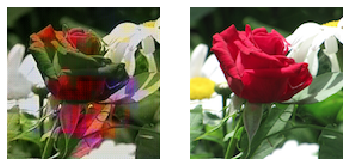

In [0]:
Visualize(G_u, greyset, colorset, num_of_img=1, loaded = False, start=5)

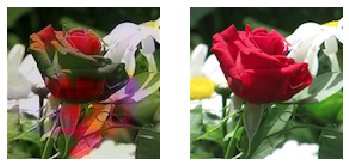

In [0]:
Visualize(G_u, greyset, colorset, num_of_img=1, loaded = False, start=5)

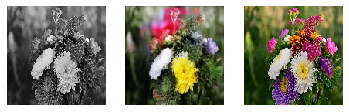

In [0]:
path = 'https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/flower-bouquet-edit.jpg'

demonstrate(path,G_u,True)

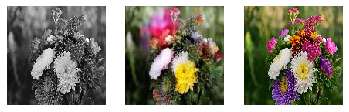

In [0]:
path = 'https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/flower-bouquet-edit.jpg'

demonstrate(path,G_u,True)

In [0]:
torch.save(G_u.state_dict(), "G_c-noise-GAN")
torch.save(D_u.state_dict(), "D_c-noise-GAN")

##Other gan

In [0]:
#D_c = Discriminator_c()
#G_c = Generator2()
losses = GANtrain2(G_c, D_c, g_lr=0.005, d_lr=0.0001, batch_size=125, num_epochs=10,noise=False)


Epoch [1/10], d_loss: 1.0064, g_loss: 6.9606, False: 1.0000, True: 1.0000
Epoch [2/10], d_loss: 1.0064, g_loss: 6.2838, False: 1.0000, True: 1.0000
Epoch [3/10], d_loss: 1.0064, g_loss: 6.8146, False: 0.9600, True: 1.0000
Epoch [4/10], d_loss: 1.0064, g_loss: 6.6937, False: 1.0000, True: 1.0000
Epoch [5/10], d_loss: 1.0064, g_loss: 6.7474, False: 0.9600, True: 1.0000
Epoch [6/10], d_loss: 1.0064, g_loss: 6.3682, False: 1.0000, True: 1.0000
Epoch [7/10], d_loss: 1.0064, g_loss: 6.2052, False: 0.9700, True: 1.0000
Epoch [8/10], d_loss: 1.0064, g_loss: 6.8633, False: 0.9900, True: 1.0000
Epoch [9/10], d_loss: 1.0064, g_loss: 5.8322, False: 0.9200, True: 1.0000
Epoch [10/10], d_loss: 1.0064, g_loss: 6.6517, False: 1.0000, True: 1.0000


In [0]:
losses = GANtrain2(G_c, D_c, g_lr=0.005, d_lr=0.0001, batch_size=125, num_epochs=10,noise=False)


Epoch [1/10], d_loss: 1.0064, g_loss: 6.8423, False: 0.9100, True: 1.0000
Epoch [2/10], d_loss: 1.0064, g_loss: 6.9623, False: 0.9200, True: 1.0000
Epoch [3/10], d_loss: 1.0064, g_loss: 6.7799, False: 0.9500, True: 1.0000
Epoch [4/10], d_loss: 1.0064, g_loss: 6.5056, False: 0.9200, True: 1.0000
Epoch [5/10], d_loss: 1.0064, g_loss: 6.6872, False: 0.9000, True: 1.0000
Epoch [6/10], d_loss: 1.0064, g_loss: 6.4333, False: 0.9200, True: 1.0000
Epoch [7/10], d_loss: 1.0064, g_loss: 6.6950, False: 0.9000, True: 1.0000
Epoch [8/10], d_loss: 1.0064, g_loss: 5.7725, False: 0.9300, True: 1.0000
Epoch [9/10], d_loss: 1.0064, g_loss: 5.8816, False: 0.9100, True: 1.0000
Epoch [10/10], d_loss: 1.0064, g_loss: 6.4172, False: 0.8800, True: 1.0000


In [0]:
losses = GANtrain2(G_c, D_c, g_lr=0.005, d_lr=0.0001, batch_size=125, num_epochs=30,noise=False)


Epoch [1/30], d_loss: 1.0064, g_loss: 6.5247, False: 0.9900, True: 1.0000
Epoch [2/30], d_loss: 1.0064, g_loss: 6.5857, False: 0.9900, True: 1.0000
Epoch [3/30], d_loss: 1.0064, g_loss: 6.3954, False: 0.9800, True: 1.0000
Epoch [4/30], d_loss: 1.0064, g_loss: 5.9082, False: 0.9900, True: 1.0000
Epoch [5/30], d_loss: 1.0064, g_loss: 5.9628, False: 0.9700, True: 1.0000
Epoch [6/30], d_loss: 1.0064, g_loss: 6.5901, False: 0.9700, True: 1.0000
Epoch [7/30], d_loss: 1.0064, g_loss: 6.0292, False: 0.9800, True: 1.0000
Epoch [8/30], d_loss: 1.0064, g_loss: 6.4295, False: 0.9800, True: 1.0000
Epoch [9/30], d_loss: 1.0064, g_loss: 6.2764, False: 0.9800, True: 1.0000
Epoch [10/30], d_loss: 1.0064, g_loss: 5.8863, False: 0.9600, True: 1.0000
Epoch [11/30], d_loss: 1.0064, g_loss: 6.1566, False: 0.9800, True: 1.0000
Epoch [12/30], d_loss: 1.0064, g_loss: 5.5625, False: 0.9800, True: 1.0000
Epoch [13/30], d_loss: 1.0064, g_loss: 6.4871, False: 0.9800, True: 1.0000
Epoch [14/30], d_loss: 1.0064, g_l

KeyboardInterrupt: ignored

In [0]:
losses = GANtrain2(G_c, D_c, g_lr=0.0075, d_lr=0.0001, batch_size=125, num_epochs=30,noise=False)


Epoch [1/30], d_loss: 1.0064, g_loss: 6.3222, False: 0.9400, True: 1.0000
Epoch [2/30], d_loss: 1.0064, g_loss: 5.9459, False: 0.9000, True: 1.0000
Epoch [3/30], d_loss: 1.0064, g_loss: 5.7940, False: 0.9900, True: 1.0000
Epoch [4/30], d_loss: 1.0064, g_loss: 6.3572, False: 0.9800, True: 1.0000
Epoch [5/30], d_loss: 1.0064, g_loss: 5.6960, False: 0.9500, True: 1.0000
Epoch [6/30], d_loss: 1.0064, g_loss: 5.9010, False: 0.9800, True: 1.0000
Epoch [7/30], d_loss: 1.0064, g_loss: 5.7207, False: 0.9100, True: 1.0000
Epoch [8/30], d_loss: 1.0064, g_loss: 5.6785, False: 0.9600, True: 1.0000
Epoch [9/30], d_loss: 1.0064, g_loss: 6.0842, False: 0.9800, True: 1.0000
Epoch [10/30], d_loss: 1.0064, g_loss: 5.4754, False: 0.9900, True: 1.0000
Epoch [11/30], d_loss: 1.0064, g_loss: 5.7473, False: 0.9900, True: 1.0000
Epoch [12/30], d_loss: 1.0064, g_loss: 6.1533, False: 0.9700, True: 1.0000
Epoch [13/30], d_loss: 1.0064, g_loss: 6.0464, False: 0.9800, True: 1.0000
Epoch [14/30], d_loss: 1.0064, g_l

In [0]:
losses = GANtrain2(G_c, D_c, g_lr=0.01, d_lr=0.0001, batch_size=125, num_epochs=10,noise=False)

In [0]:
torch.cuda.empty_cache() 
import gc ; gc.collect()

0

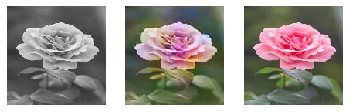

In [0]:
path = 'https://images.pexels.com/photos/736230/pexels-photo-736230.jpeg'

demonstrate(path,G_c,True)

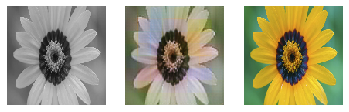

In [0]:
path = 'https://cdn.theatlantic.com/assets/media/img/mt/2017/10/Pict1_Ursinia_calendulifolia/lead_720_405.jpg'

demonstrate(path,G_c,True)

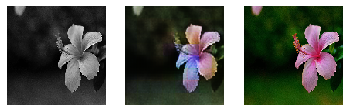

In [0]:
path = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hibiscus-1520217326.jpg'

demonstrate(path,G_c,True)

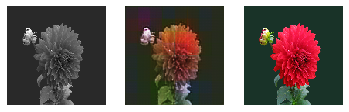

In [0]:
path = 'https://images.pexels.com/photos/60597/dahlia-red-blossom-bloom-60597.jpeg?cs=srgb&dl=red-dahlia-flower-60597.jpg&fm=jpg'

demonstrate(path,G_c,True)

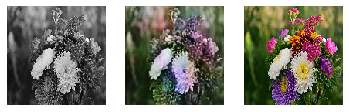

In [0]:
path = 'https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/flower-bouquet-edit.jpg'

demonstrate(path,G_c,True)

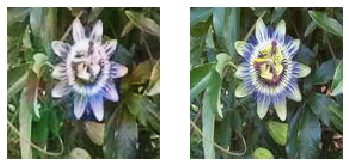

In [0]:
Visualize(G_c, greyset, colorset, num_of_img=1, loaded = False, start=220)

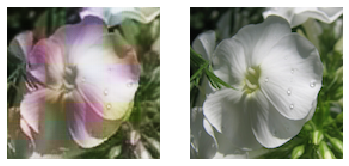

In [0]:
Visualize(G_c, test_g_set, test_c_set, num_of_img=1, loaded = False, start=19)

In [0]:
torch.save(G_c.state_dict(), "Gen2-final-GAN")
torch.save(D_c.state_dict(), "D_c-final-GAN")

In [0]:
#Initiate Training
D_c = Discriminator_c()
G_c = Generator2()
losses = GANtrain(G_c, D_c, g_lr=0.001, d_lr=0.0001, batch_size=21, num_epochs=150,noise=False)

Epoch [1/150], d_loss: 1.0064, g_loss: 27.0310, False: 0.0000, True: 1.0000
Epoch [2/150], d_loss: 1.0797, g_loss: 20.2874, False: 0.0000, True: 1.0000
Epoch [3/150], d_loss: 1.6265, g_loss: 17.0784, False: 0.0000, True: 1.0000
Epoch [4/150], d_loss: 1.6265, g_loss: 15.2423, False: 0.0000, True: 1.0000
Epoch [5/150], d_loss: 1.0728, g_loss: 14.5140, False: 0.0143, True: 1.0000
Epoch [6/150], d_loss: 1.6265, g_loss: 13.4763, False: 0.0000, True: 1.0000
Epoch [7/150], d_loss: 1.0353, g_loss: 13.3283, False: 0.0000, True: 1.0000
Epoch [8/150], d_loss: 1.1642, g_loss: 12.9401, False: 0.0000, True: 1.0000
Epoch [9/150], d_loss: 1.0065, g_loss: 12.6826, False: 0.0143, True: 1.0000
Epoch [10/150], d_loss: 1.0064, g_loss: 12.4450, False: 0.0000, True: 1.0000
Epoch [11/150], d_loss: 1.0064, g_loss: 12.2757, False: 0.0000, True: 1.0000
Epoch [12/150], d_loss: 1.0064, g_loss: 12.1118, False: 0.0000, True: 1.0000
Epoch [13/150], d_loss: 1.0064, g_loss: 11.9024, False: 0.0000, True: 1.0000
Epoch [1

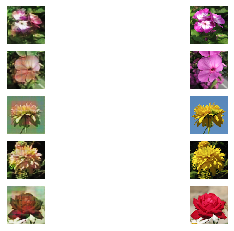

In [0]:
#210 epoch with Generator2
Visualize(G_c, greyset, colorset, num_of_img=5, loaded = False, start=11)

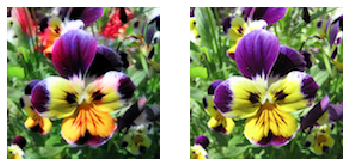

In [0]:
Visualize(G_c, greyset, colorset, num_of_img=1, loaded = False, start=55)

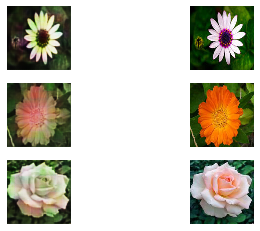

In [0]:
Visualize(G_c, test_g_set, test_c_set, num_of_img=3, loaded = False, start=2)

In [0]:
#D_c = Discriminator_c()
#G_c = Generator3()
losses = GANtrain(G_c, D_c, g_lr=0.01, d_lr=0.01, batch_size=21, num_epochs=50,noise=False)

Epoch [1/50], d_loss: 1.6265, g_loss: 15.3253, False: 0.0000, True: 1.0000
Epoch [2/50], d_loss: 1.6265, g_loss: 10.5269, False: 0.0000, True: 1.0000
Epoch [3/50], d_loss: 1.6265, g_loss: 10.1484, False: 0.0000, True: 1.0000
Epoch [4/50], d_loss: 1.6265, g_loss: 9.8964, False: 0.0000, True: 1.0000
Epoch [5/50], d_loss: 1.6265, g_loss: 9.5270, False: 0.0000, True: 1.0000
Epoch [6/50], d_loss: 1.6265, g_loss: 9.4680, False: 0.0000, True: 1.0000
Epoch [7/50], d_loss: 1.6265, g_loss: 9.3204, False: 0.0000, True: 1.0000
Epoch [8/50], d_loss: 1.6265, g_loss: 9.1561, False: 0.0000, True: 1.0000
Epoch [9/50], d_loss: 1.6265, g_loss: 9.1011, False: 0.0000, True: 1.0000
Epoch [10/50], d_loss: 1.6265, g_loss: 9.0457, False: 0.0000, True: 1.0000
Epoch [11/50], d_loss: 1.6265, g_loss: 9.0025, False: 0.0000, True: 1.0000
Epoch [12/50], d_loss: 1.6265, g_loss: 8.9888, False: 0.0000, True: 1.0000
Epoch [13/50], d_loss: 1.6265, g_loss: 9.0160, False: 0.0000, True: 1.0000
Epoch [14/50], d_loss: 1.6265, 

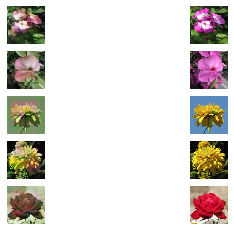

In [0]:
#210 epoch with Generator3
Visualize(G_c, greyset, colorset, num_of_img=5, loaded = False, start=11)

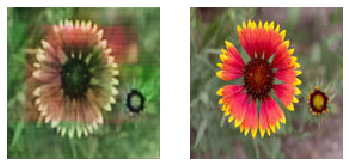

In [0]:
Visualize(G_c, test_g_set, test_c_set, num_of_img=1, loaded = False, start=0)

In [0]:
checker = loader_function(greyset,21)
a = iter(checker).next()[0]
a = a.cuda()
D_c(a)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.3495e-33, 0.0000e+00, 4.4755e-19, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

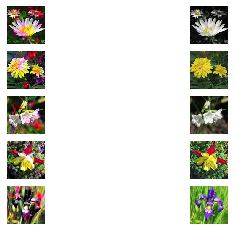

In [0]:
#210 epoch with G_c
Visualize(G_c, greyset, colorset, num_of_img=5, loaded = False, start=151)

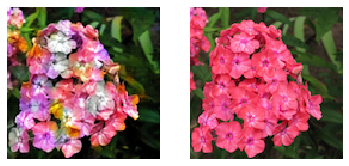

In [0]:
G_c.train()
#G_c.eval()
Visualize(G_c, greyset, colorset, num_of_img=1, loaded = False, start=8)

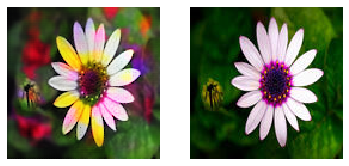

In [0]:
Visualize(G_c, test_g_set, test_c_set, num_of_img=1, loaded = False, start=2)

In [0]:
D = Discriminator()
G = Generator()
losses = GANtrain(G, D, lr=0.001, batch_size=3, num_epochs=100,noise=False)

In [0]:
Visualize(G, greyset, colorset, num_of_img=3, loaded = False, start=0)

In [0]:
Visualize(G, greyset, colorset, num_of_img=1, loaded = False, start=5)

In [0]:
D1 = Discriminator1()
G1 = Generator1()
losses = GANtrain(G1, D1, lr=5e-4, batch_size=21, num_epochs=15,noise=False)

In [0]:
D2 = Discriminator2()
G2 = Generator2()
losses = GANtrain(G2, D2, lr=8e-5, batch_size=21, num_epochs=15,noise=True)

In [0]:
D3 = Discriminator3()
G3 = Generator3()
losses = GANtrain(G3, D3, lr=8e-5, batch_size=21, num_epochs=15,noise=True)

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

In [0]:
Visualize(G, greyset, colorset, num_of_img=3, loaded = False, start=0)

In [0]:
Visualize(G1, greyset, colorset, num_of_img=3, loaded = False, start=0)

In [0]:
Visualize(G2, greyset, colorset, num_of_img=3, loaded = False, start=0)

In [0]:
Visualize(G3, greyset, colorset, num_of_img=3, loaded = False, start=0)

In [0]:
checker = loader_function(greyset, 21)

In [0]:
A= iter(checker).next()[0]
A.shape

In [0]:
temp = A[0].unsqueeze(0)
temp.shape
otto=G(temp.cuda())
otto

In [0]:
a = D(iter(checker).next()[0].cuda())
a.squeeze().shape

In [0]:
labels = torch.ones(64)
labels.shape

In [0]:
# criterion = nn.BCEWithLogitsLoss()
# d_real_loss = criterion(a.squeeze(), labels.cuda())

#TroubleShooting

##Dataset misalignment

In [0]:
print(len(greyset))
print(len(colorset))

9341
9341


In [0]:
for i in range(len(greyset)):
  if(greyset.samples[i][0].strip('drive/My Drive/APS360H1 Project/flower images/gray/gray/') != colorset.samples[i][0].strip('drive/My Drive/APS360H1 Project/flower images/color/color/')
          ):
    print(i)

#Autoencoder Training

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!


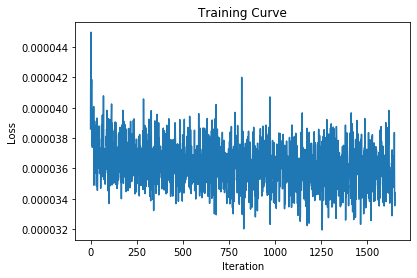

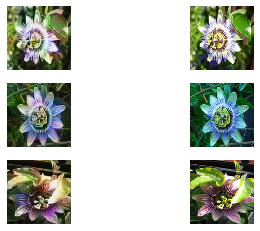

In [0]:
#model_f = Generator2()
outputs1 = concattrain(model_f, concatset, num_epochs=50, batch_size=250, learning_rate=5e-4,use_cuda=True)
Visualize(model_f, greyset, colorset, num_of_img=3, loaded = False, start=0)

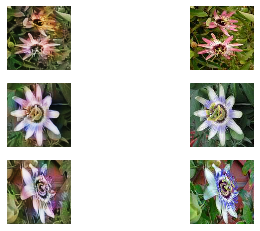

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=3, loaded = False, start=10)

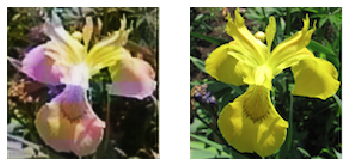

In [0]:
Visualize(model_f, test_g_set, test_c_set, num_of_img=1, loaded = False,start=79)

In [0]:
model1_path = "drive/My Drive/APS360H1 Project/Train_weights/Gen2_550e_"
model_test = Generator2()
load_model(model_test, model1_path)

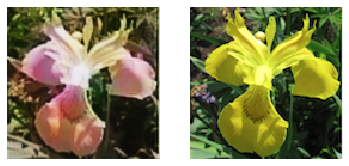

In [0]:
Visualize(model_test, test_g_set, test_c_set, num_of_img=1, loaded = True,start=79)

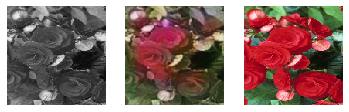

In [0]:
path = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/types-of-flowers-begonia-1520215354.jpg'

demonstrate(path,model_f,True)

In [0]:
path = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/types-of-flowers-begonia-1520215354.jpg'

demonstrate(path,model_f,True)

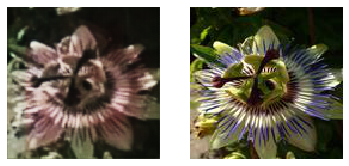

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False, start=90)

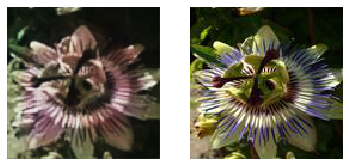

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False, start=90)

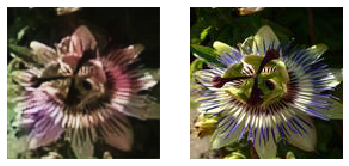

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False, start=90)

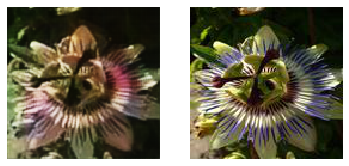

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False, start=90)

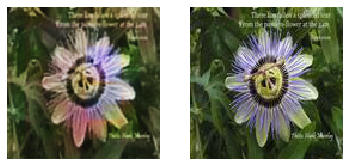

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False, start=67)

In [0]:
torch.save(model_f.state_dict(), 'Gen2_700e_MSE')

CUDA is True
1
2
3
4
5
6
epoch 1 done!
7
8
9
10
11
12
epoch 2 done!
13
14
15
16
17
18
epoch 3 done!
19
20
21
22
23
24
epoch 4 done!
25
26
27
28
29
30
epoch 5 done!
31
32
33
34
35
36
epoch 6 done!
37
38
39
40
41
42
epoch 7 done!
43
44
45
46
47
48
epoch 8 done!
49
50
51
52
53
54
epoch 9 done!
55
56
57
58
59
60
epoch 10 done!
61
62
63
64
65
66
epoch 11 done!
67
68
69
70
71
72
epoch 12 done!
73
74
75
76
77
78
epoch 13 done!
79
80
81
82
83
84
epoch 14 done!
85
86
87
88
89
90
epoch 15 done!
91
92
93
94
95
96
epoch 16 done!
97
98
99
100
101
102
epoch 17 done!
103
104
105
106
107
108
epoch 18 done!
109
110
111
112
113
114
epoch 19 done!
115
116
117
118
119
120
epoch 20 done!


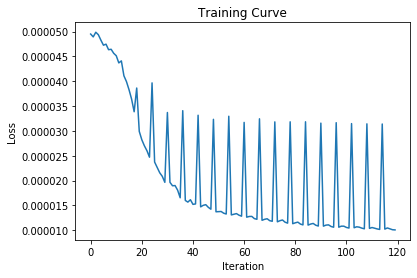

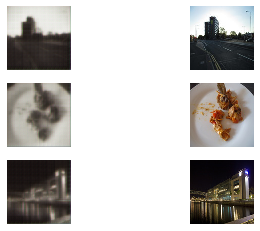

In [0]:
model_f = Generator2()
outputs1 = train(model_f, colorset = colorset,greyset = greyset, num_epochs=20, batch_size=1750, learning_rate=1e-3,use_cuda=True)
Visualize(model_f, greyset, colorset, num_of_img=3, loaded = False, start=0)

#Memory Management

In [0]:
torch.cuda.empty_cache() 
import gc ; gc.collect()

0

In [0]:
torch.cuda.empty_cache() 

In [0]:
torch.cuda.memory_cached(device=None)

10647240704

In [0]:
torch.cuda.memory_allocated(device=None)

3982128128

In [0]:
torch.cuda.max_memory_allocated(device=None)

11524759552

In [0]:
torch.save(model_f.state_dict(), "god_save_the_queen")

In [0]:
checker = loader_function(colorset,64)
iter(checker).next()[0][25]

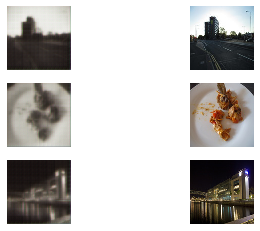

In [0]:
Visualize(model_f, greyset, colorset, num_of_img=3, loaded = False, start=0)

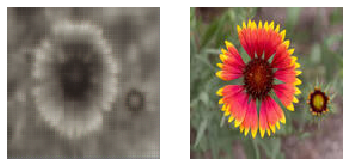

In [0]:
Visualize(model_f, test_set, test_c_set, num_of_img=1, loaded = False,start=0)

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

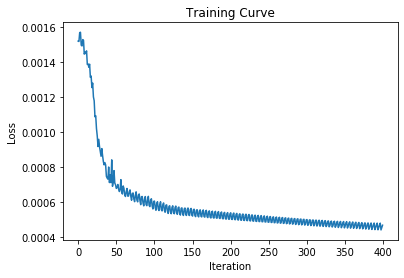

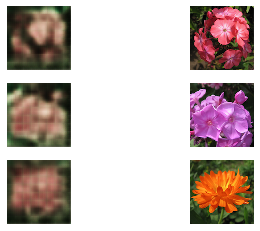

In [0]:
modelg1 = Generator1()
outputs1 = train(modelg1, colorset = colorset,greyset = greyset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True)
Visualize(modelg1, greyset, colorset, num_of_img=3, loaded = False, start=0)

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

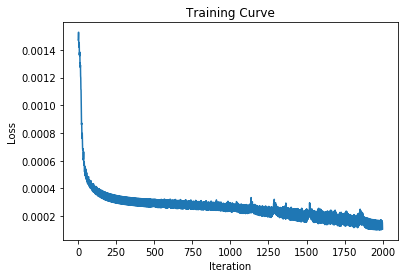

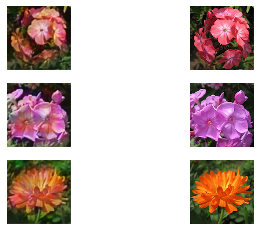

In [0]:
modelg2 = Generator2()
outputs1 = train(modelg2, colorset = colorset,greyset = greyset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True)
Visualize(modelg2, greyset, colorset, num_of_img=3, loaded = False, start=0)

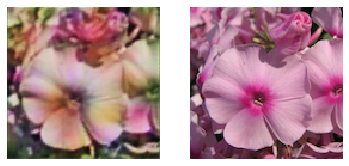

In [0]:
Visualize(modelg2, greyset, colorset, num_of_img=1, loaded = False, start=3)

In [0]:
Visualize(modelg2, test_set, test_c_set, num_of_img=2, loaded = False,start=2)

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

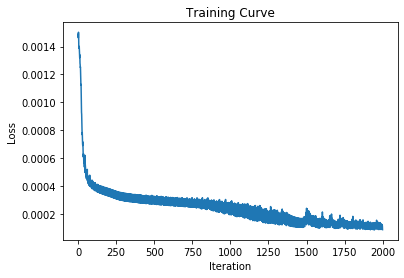

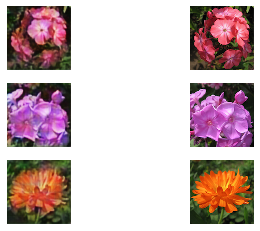

In [0]:
modelg3 = Generator3()
outputs1 = train(modelg3, colorset = colorset,greyset = greyset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True)
Visualize(modelg3, greyset, colorset, num_of_img=3, loaded = False, start=0)

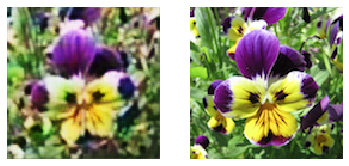

In [0]:
Visualize(modelg3, greyset, colorset, num_of_img=1, loaded = False, start=55)

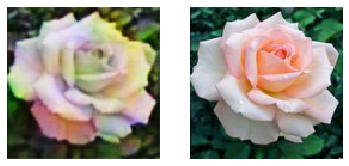

In [0]:
Visualize(modelg3, test_set, test_c_set, num_of_img=1, loaded = False,start=4)

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

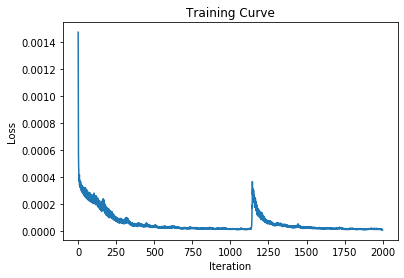

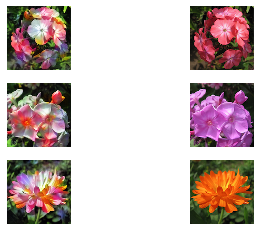

In [0]:
model_c = Generator_c()
outputs1 = train(model_c, colorset = colorset,greyset = greyset, num_epochs=500, batch_size=64, learning_rate=1e-3,use_cuda=True)
Visualize(model_c, greyset, colorset, num_of_img=3, loaded = False, start=0)

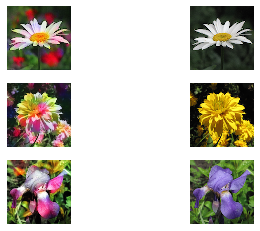

In [0]:
Visualize(model_c, greyset, colorset, num_of_img=3, loaded = False, start=45)

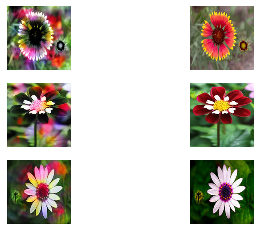

In [0]:
Visualize(model_c, test_set, test_c_set, num_of_img=3, loaded = False,start=0)

##Model1 Training

epoch 0 done!
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch

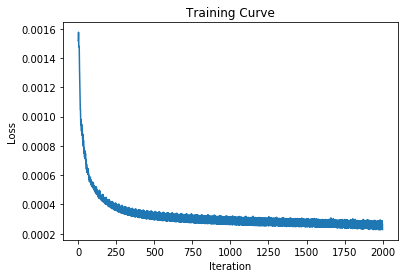

In [0]:
model1 = CNNAutoEncoder()
outputs1 = train(model1)

In [0]:
torch.save(model1.state_dict(), "god_save_the_queen")

##Model2 Training

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

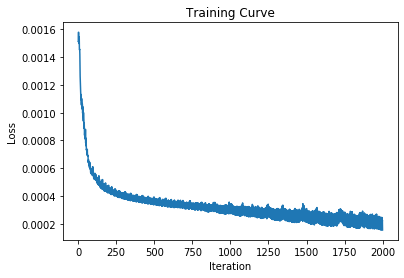

In [0]:
model2 = CNNAutoEncoderv2()
outputs2 = train(model2)

In [0]:
torch.save(model2.state_dict(), "Model2_parameter")

In [0]:
model2

CNNAutoEncoderv2(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

##Model3 Training

In [0]:
model32 = CNNAutoEncoderv3()
outputs32 = train(model32)

CUDA is True
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch 

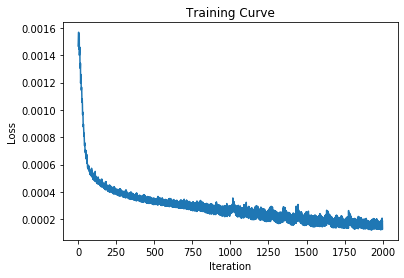

In [0]:
model3 = CNNAutoEncoderv3()
outputs3 = train(model3)

In [0]:
torch.save(model3.state_dict(), "Model3_parameter")

#Loading Model 

In [0]:
def load_model(model, path):
  model.load_state_dict(torch.load(path))
  return 

In [0]:
model1_path = "drive/My Drive/APS360H1 Project/Train_weights/god_save_the_queen"


In [0]:
model2_path = "drive/My Drive/APS360H1 Project/Train_weights/Model2_parameter"

In [0]:
model3_path = "drive/My Drive/APS360H1 Project/Train_weights/Model3_parameter"

In [0]:
model1 = CNNAutoEncoder()
load_model(model1, model1_path)

In [0]:
model2 = CNNAutoEncoderv2()
load_model(model2, model2_path)

In [0]:
model3 = CNNAutoEncoderv3()
load_model(model3, model3_path)

#Visualization

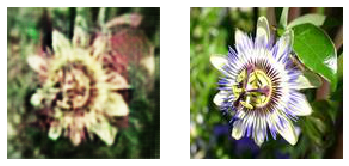

In [0]:
Visualize(model1, greyset, colorset, num_of_img=1, loaded = True,start=0)

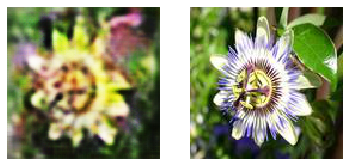

In [0]:
Visualize(model2, greyset, colorset, num_of_img=1, loaded = True,start=0)

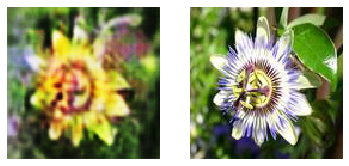

In [0]:
Visualize(model3, greyset, colorset, num_of_img=1, loaded = True,start=0)

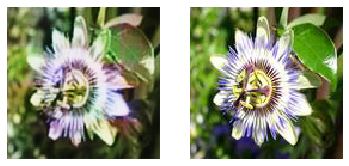

In [0]:
#Autoencoder MSE trained
Visualize(model_f, greyset, colorset, num_of_img=1, loaded = False,start=0)

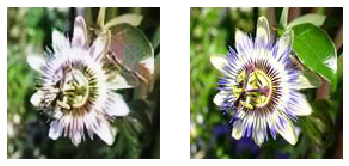

In [0]:
Visualize(G_c, greyset, colorset, num_of_img=1, loaded = False,start=0)

In [0]:
num=98

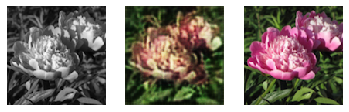

In [0]:
Visualize2(model1, greyset, colorset, num_of_img=1, loaded = True,start=num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


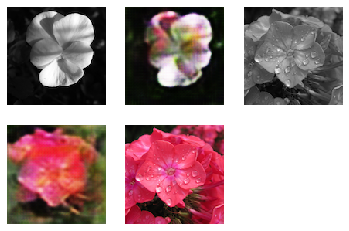

In [0]:
Visualize2(model2, greyset, colorset, num_of_img=2, loaded = True,start=num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


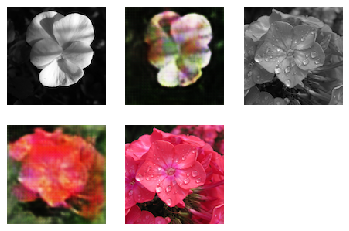

In [0]:
Visualize2(model3, greyset, colorset, num_of_img=2, loaded = True,start=num)

In [0]:
c=1

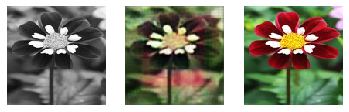

In [0]:
Visualize2(model1, test_set, test_c_set, num_of_img=1, loaded = True,start=c)

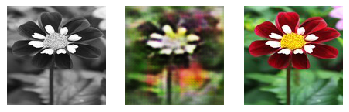

In [0]:
Visualize2(model2, test_set, test_c_set, num_of_img=1, loaded = True,start=c)

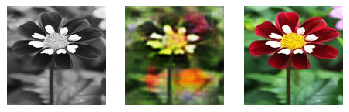

In [0]:
Visualize2(model3, test_set, test_c_set, num_of_img=1, loaded = True,start=c)

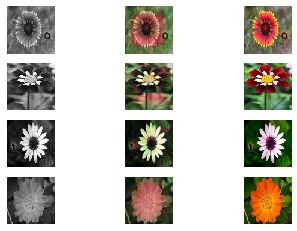

In [0]:
Visualize2(model1, test_set, test_c_set, num_of_img=4, loaded = True,start=0)

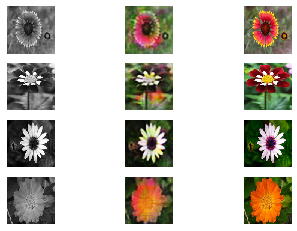

In [0]:
Visualize2(model2, test_set, test_c_set, num_of_img=4, loaded = True,start=0)

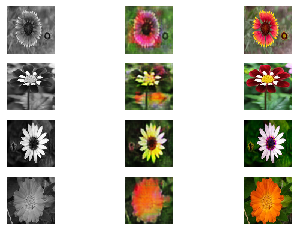

In [0]:
Visualize2(model3, test_set, test_c_set, num_of_img=4, loaded = True,start=0)

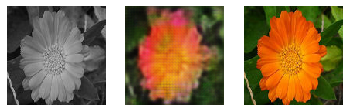

In [0]:
Visualize2(model2, test_set, test_c_set, num_of_img=1, loaded = True,start=3)

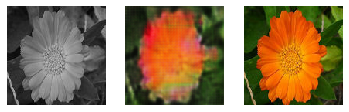

In [0]:
Visualize2(model3, test_set, test_c_set, num_of_img=1, loaded = True,start=3)

#Pickle

##pickle load

In [0]:
import pickle
import os

# open a file, where you stored the pickled data
file = open('drive/My Drive/APS360H1 Project/important', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Output hidden; open in https://colab.research.google.com to view.

##pickle save

In [0]:

import pickle

# take user input to take the amount of data
data = concatset
# open a file, where you ant to store the data
file = open('important-2', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

#Demonstrate

In [0]:
model_path = "drive/My Drive/APS360H1 Project/Train_weights/Gen2-final-GAN"

In [0]:
model = Generator2()
load_model(model, model_path)

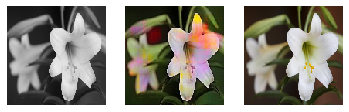

In [0]:
path = 'https://www.inforum.com/1006359-5b5sss-042019.F.FF.GrowingTogether.1.jpg/alternates/BASE_LANDSCAPE/042019.F.FF.GrowingTogether.1.jpg'

demonstrate(path,G_u,train=True)

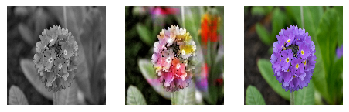

In [0]:
path = 'https://upload.wikimedia.org/wikipedia/commons/c/ce/Primula_Denticulata_EDI.jpg'

demonstrate(path,G_u,train=True)